Titanic Data Analysis

Author: Sabyasachi Datta

Roll: OPD20009

**Content**

Overview
1.   Importing all the libraries necessary for this project
2.   Load Data from CSVs - Data input
3.   Basic head view of the data
4.   Data description
5.   Data summary
6.   Univariate analysis

**Overview**

This study is an exercise to show how to use foundations of EDA in order to import, study, visualize, and present the raw data in a method that is easy for any user to digest and understand.

This study uses passenger data from the ill-fated maiden voyage of the RMS Titanic (1912). The data (and explanation of the data) can be obtained from: https://www.kaggle.com/c/titanic/data

**Importing all the libraries necessary for this project**

Below are the libraries that are used in order to perform EDA

In [ ]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

**1] Load Data from CSVs** - Data input

Loading the data into the pandas data frame is and just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab I have upload file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

First, the raw comma separated values (.cvs) data will be loaded into a Python (NumPy) series.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


**2. Basic head view of the data**

In [ ]:
df = pd.read_csv("train.csv")
# To display the top 5 rows 
df.head(5)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail(5)                        # To display the botton 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**3. Data description**

In [ ]:
# Description of the main_file
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**4. Data summary**

Here we check for the datatypes because sometimes the fare or thea ge of the passenger would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in float format so nothing to worry.

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Check the 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Fixing NaN data values**

In [ ]:
# Find length of the column "Age"
len(df["Age"])

891

In [ ]:
# View the NaN in Age for Female-Sex
female_age = df[df["Sex"] == "female"]["Age"]

In [ ]:
female_age.tail()

880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, dtype: float64

In [ ]:
# View the NaN in Age for Male-Sex
male_age = df[df["Sex"] == "male"]["Age"]

In [ ]:
male_age.head()

0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: Age, dtype: float64

In [ ]:
# Store median value into variable
female_median = female_age.median()
male_median = male_age.median()

In [ ]:
# Assign age and sex into lists
age = list(df["Age"])
sex = list(df["Sex"])

In [ ]:
# The NaN values in female ages are replaced by the median of the female ages
# The NaN values in male ages are replaced by the median of the male ages
     
# Get the median by sex
medians = df.groupby('Sex')['Age'].median()
# Set dataframe index by sex
df = df.set_index(['Sex'])
# Fill na
df['Age'] = df['Age'].fillna(medians)
# if you want to reset the index
df = df.reset_index()

**Data Analysis**



A] **Percentage Deaths and Survivors**

This section shows a bar graph and a pie chart of the percentage of deaths and survivors of the passengers on titanic

In [ ]:
# Total number of passengers
no_of_passengers = df.groupby("Survived").size()
no_of_passengers

Survived
0    549
1    342
dtype: int64

In [ ]:
# Total number of survivors
no_of_survivors = no_of_passengers[1]
no_of_survivors

342

In [ ]:
# Total number of deaths
no_of_deaths = no_of_passengers[0]
no_of_deaths

549

In [ ]:
# Percentage of total survivors and deaths
percent_of_survivors = (no_of_survivors/(no_of_survivors + no_of_deaths))*100
percent_of_deaths = (no_of_deaths/(no_of_survivors + no_of_deaths))*100

In [ ]:
percent_of_survivors

38.38383838383838

In [ ]:
percent_of_deaths

61.61616161616161

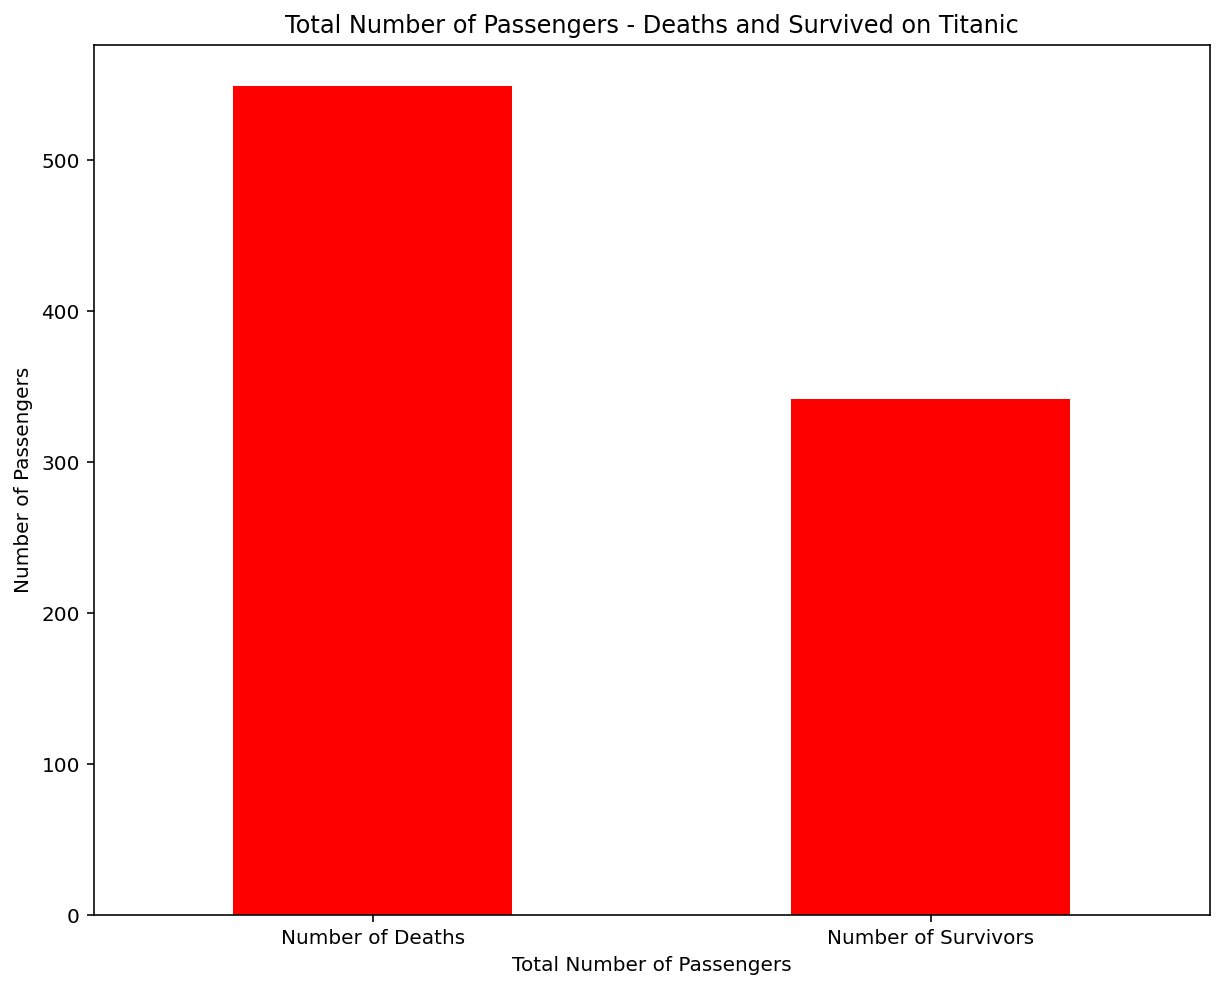

In [ ]:
objects = ('Number of Deaths', 'Number of Survivors')
bars = np.arange(len(objects))
no_of_passengers.plot(kind = "bar", figsize = (10,8), color = 'r')
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Total Number of Passengers")
plt.title("Total Number of Passengers - Deaths and Survived on Titanic")
plt.show()

In [ ]:
# The following function is used to create counts and percentages in the pie
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0.5, 1.0, 'Total Number of Passengers - Deaths and Survived on Titanic')

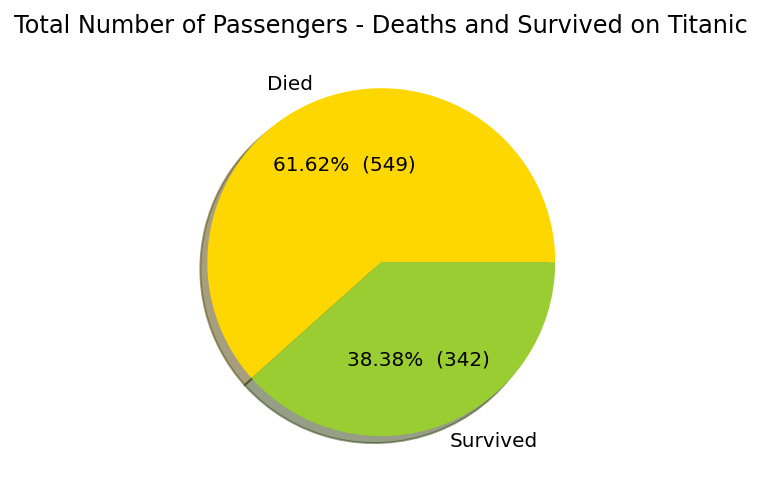

In [ ]:
# Plot pie chart for Total Number of Passenger Deaths and Survived

df_survived = df.groupby('Survived').size()

colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
plt.pie(df_survived, shadow = True, colors = colors, labels = ['Died', 'Survived'], autopct = make_autopct(df_survived))
plt.title('Total Number of Passengers - Deaths and Survived on Titanic')

Analysis -
It can be analyzed that

Total Percentage of Number of Deaths = **61.61%**

Total Percentage of Number of Survivors = **38.38%**

**B] Female - Male -- Deaths and Survivors**

This section shows a pie chart and a bar graph of the percentage of deaths and survivors of female and male passengers on titanic.

In [ ]:
# Grouping by Sex
male_female = df.groupby("Sex").size()

In [ ]:
male_female

Sex
female    314
male      577
dtype: int64

**Let's take a Look at our data graphically:**